# Sistema de Predición

## Preparación de Datos

In [2]:
# libreria arbol decision y procesamiento data
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Graficar arbol
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
import numpy as np



In [3]:
# Carga del archivo con configuraciones para que funcionen con utf-8
data = pd.read_csv('data.csv', header=0, encoding='unicode_escape')

In [4]:
# Si tuvieran valores nulos
data = data.dropna()

In [5]:
# Asignar a variables valores de columnas especificas del archivo
toc = data.iloc[:, 4].values
animo = data.iloc[:, 5].values
obediencia = data.iloc[:, 6].values

# Borramos columnas que vamos a reemplazar
data.drop([ 'animo', 'obediencia', 'fecha'], axis='columns', inplace=True)

In [6]:
# Instancia de LabelEncoder
LabelEncoder_data = LabelEncoder()

# Escalar volver datos string en numeros
data['animo'] = LabelEncoder_data.fit_transform(animo)
data['obediencia'] = LabelEncoder_data.fit_transform(obediencia)


In [7]:
#castear algunas columnas con el tipo de dato correspondiente
data = data.astype({"id_niño": int, "actividad": int, "categoria_actividad": int, "edad": int, "tiempo_rsp_seg": int})

In [8]:
#filtrar por edades
data = data[(data['edad'] > 4) & (data['edad'] <= 10)]

## Entrenamiento Modelo

In [9]:
##Le asignamos a una nueva variable los datos que vamos a manejar en el modelo
predictors = data[['animo', 'obediencia']]
targets = data['TDAH_TOP_TC']

predictors

,animo,obediencia
0,5,0
1,5,0
5,3,1
6,3,1
7,5,1
...,...,...
539,2,0
543,4,0
544,0,0
545,5,0


In [10]:
#Asignamos los labels que va a manejar el arbol
predictors_labels = ['obediencia', 'animo']
target_label = ['si', 'no']

In [11]:
#Obtenemos solo los valores para poder entrenar el arbol
x = data.values
y = data['TDAH_TOP_TC']

In [12]:
#Creamos el train_test_split que "divide" la informacin una de entrenamiento 80% y otra de test 20%
x_entrena, x_test, y_entrena, y_test = train_test_split(predictors,targets,test_size=0.2, random_state=123)

In [13]:
#imprimimos division de data para test y entrenamiento
print("entrena", x_entrena.shape, y_entrena.shape)
print("test", x_test.shape, y_test.shape)

entrena (173, 2) (173,)
test (44, 2) (44,)


In [14]:
#Construimos el arbol con una maxima profundida de 4 
arbol = DecisionTreeClassifier(max_depth=3)

In [15]:
#Entrenamos el arbol con los datos
arbol.fit(x_entrena, y_entrena)

DecisionTreeClassifier(max_depth=3)

In [16]:
#probamos la prediccion con datos test
arbolpredicc= arbol.predict(x_test)
arbolpredicc

array(['si', 'no', 'si', 'no', 'no', 'no', 'no', 'no', 'si', 'si', 'no',
       'si', 'no', 'no', 'si', 'no', 'si', 'no', 'no', 'si', 'si', 'no',
       'no', 'no', 'si', 'si', 'si', 'si', 'no', 'no', 'no', 'si', 'si',
       'si', 'si', 'si', 'si', 'no', 'no', 'si', 'no', 'si', 'si', 'no'],
      dtype=object)

## Evaluar Prediccion

In [17]:
#Porcentaje de Acierto de la prediccion en datos de test
arbol.score(x_test,y_test)

0.5227272727272727

In [18]:
#Porcentaje de Acierto de la prediccion en datos de entrenamiento
arbol.score(x_entrena,y_entrena)

0.5953757225433526

## Visualizar Arbol

In [19]:
#Visualizamos el arbol en forma de texto
from sklearn import tree
text_representation = tree.export_text(arbol)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: no
|   |--- feature_1 >  0.50
|   |   |--- class: no
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- class: si
|   |   |--- feature_0 >  3.50
|   |   |   |--- class: no
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- class: no
|   |   |--- feature_0 >  4.50
|   |   |   |--- class: si



Profundidad del árbol: 3
Número de nodos terminales: 6


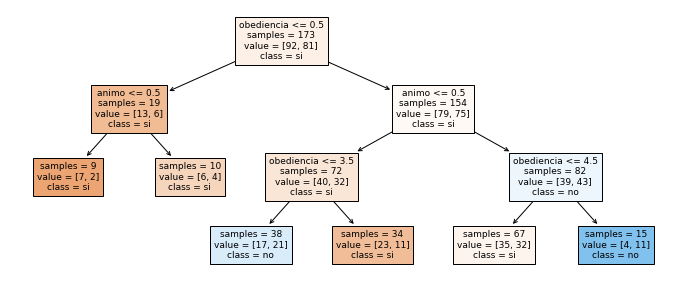

In [20]:
# Gráficar arbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {arbol.get_depth()}")
print(f"Número de nodos terminales: {arbol.get_n_leaves()}")

plot = plot_tree(
    
            decision_tree = arbol,
            feature_names = predictors_labels,
            class_names   = target_label,
            filled        = True,
            impurity      = False,
            fontsize      = 9,
            precision     = 2,
            ax            = ax
       )
plt.savefig("arbol.png")